In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


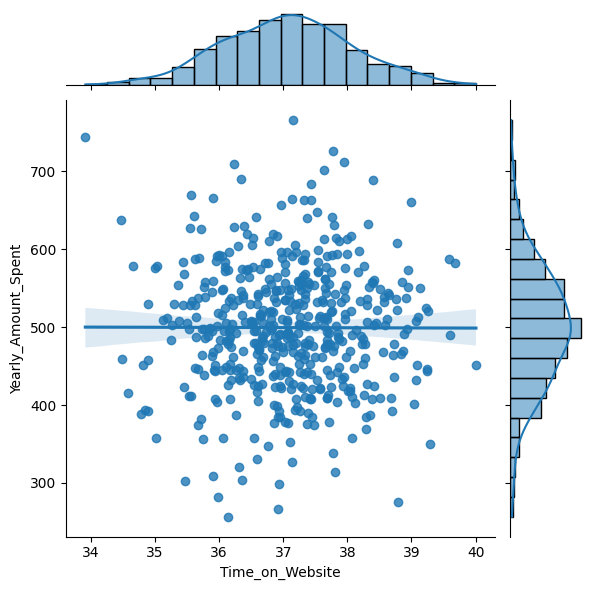

In [6]:
sns.jointplot(x = "Time_on_Website", y = "Yearly_Amount_Spent", data = df, kind='reg') 

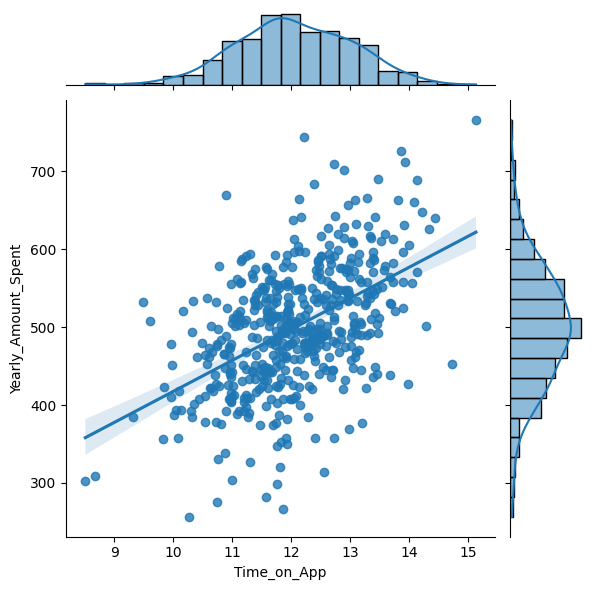

In [7]:
sns.jointplot(x = "Time_on_App", y = "Yearly_Amount_Spent", data = df, kind='reg') 

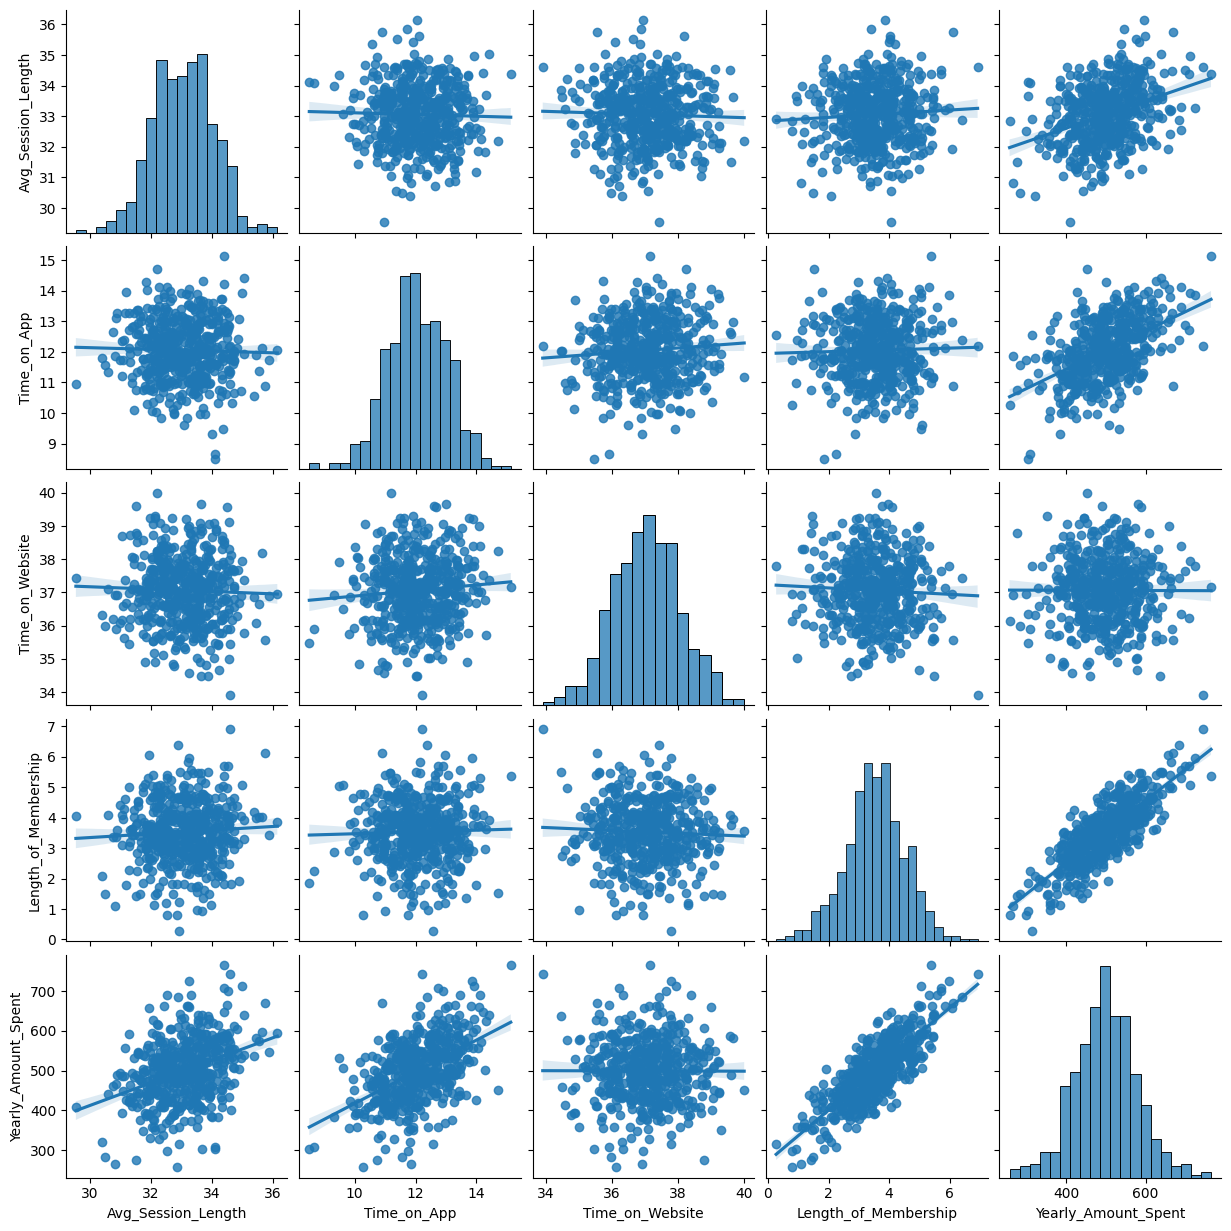

In [9]:
sns.pairplot(df, kind='reg')

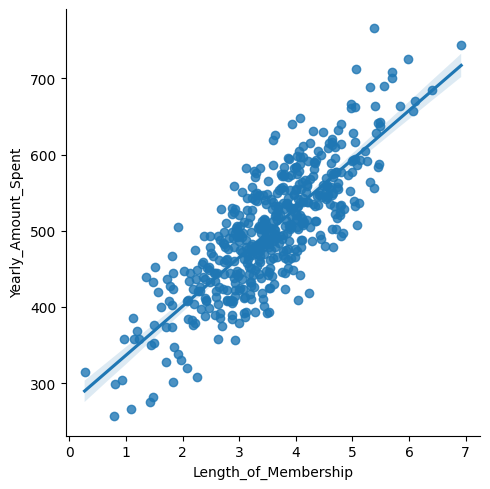

In [10]:
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data = df) 

ML Start

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> --> Simple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub>  + b<sub>2</sub>X<sub>2</sub> + .... + b<sub>n</sub>X<sub>n</sub> --> Multiple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>1</sub><sup>2</sup> + .... + b<sub>n</sub>X<sub>1</sub><sup>n</sup> --> Polynomial Linear Regression

Minimize --> Ordinary Leat Squares/Sum of Squared Errors = Σ(y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup> (actual - predicted)

In [11]:
# independent and Dependent Variables

X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [17]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [20]:
# Train the Model on Traing Set (Multiple Linear Regression - More than one independant variable)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict output on Test Set
y_pred = linear_regressor.predict(X_test)

In [22]:
# Calculate Metrics

from sklearn import metrics
import math

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

MSE:  95.03600581432381
RMSE:  9.748641229131566
MAE:  7.637028243772222
R Squared:  0.9809686791264653


In [24]:
print("b0 : ", linear_regressor.intercept_)

cols = df.iloc[:, 3:-1].columns
cdf = pd.DataFrame(data=linear_regressor.coef_, index=cols, columns=['Coeff'], dtype=float, copy=False)
print("\n b1, b2, .., bn \n", cdf)

b0 :  -1071.220547193681

 b1, b2, .., bn 
                           Coeff
Avg_Session_Length    25.947252
Time_on_App           39.066821
Time_on_Website        0.682530
Length_of_Membership  61.334694


Statistical Significance

In [32]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7766.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        00:22:28   Log-Likelihood:                -1856.9
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     495   BIC:                             3745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1051.5943     22.993    -45.736      0.0